In [ ]:
%pip install opendatasets
import opendatasets as od
import pandas
 
od.download("https://www.kaggle.com/datasets/arpan2022/carcolourdataset")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: arpan2022
Your Kaggle Key: ··········


100%|██████████| 574M/574M [00:06<00:00, 87.4MB/s]


### STEP 1-
This code imports required packages, libraries, and modules for the script:

- `os` is used to interact with the underlying operating system. It provides functionalities such as reading and writing files, managing directories, and navigating the file system.

- `math` is used to perform mathematical operations. It offers a set of mathematical functions that allow users to perform operations such as trigonometry, logarithms, and exponentials on numeric values.

- `numpy` is used for numerical computing and array manipulation. It provides support for large, multi-dimensional arrays and matrices, as well as a large collection of high-level mathematical functions to operate on these arrays.

- `sys` is used to interact with the Python interpreter. It provides access to some variables used or maintained by the interpreter and to functions that interact strongly with the interpreter.

- `cv2` is used for computer vision and image processing. It provides a variety of functions for reading and writing images, performing edge detection, and detecting objects in images.

- `sklearn` is used for machine learning algorithms and evaluation metrics. It provides a variety of machine learning algorithms, such as support vector machine (SVM) classifiers, as well as tools for data preprocessing, model selection, and evaluation.

- `joblib` is used for job scheduling and parallel computing. It provides tools for parallelising computations across multiple CPU cores or for caching results to disk.

- `matplotlib.pyplot` is used for data visualisation and plotting. It offers a variety of customisation options and can be used to generate publication-quality figures.


In [ ]:
import os
import math
import numpy as np
import sys
import cv2
from sklearn import svm
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
from sklearn.preprocessing import label_binarize
from sklearn.metrics import confusion_matrix
import joblib
import matplotlib.pyplot as plt

### STEP 2 - Data pre-processing and loading
This code sets the path of the directories containing the training, validation, and test datasets.

The `extract_features` method extracts features from an image by resising it, converting it to the HSV color space, computing separate histograms for the H, S, and V channels, concatenating the histograms into a single feature vector, normalising the feature vector, and flattening it into a 1D array. The method returns the normalised and flattened feature vector as a NumPy array.

The `load_dataset` method takes a path to a dataset as input and returns two NumPy arrays, X and y, representing the dataset's features and labels, respectively. It loops through each subdirectory in the given path and calls the extract_features method to extract features from each image in the subdirectory. It then appends the extracted features and corresponding labels to lists X and y. The code then calls this function three times, each time with a different dataset path, to load and preprocess the training, validation, and testing datasets. The resulting features and labels are assigned to variables train_X, train_y, val_X, val_y, test_X, and test_y, respectively.

In [ ]:
testing_dataset = '/content/carcolourdataset/test'
training_dataset = '/content/carcolourdataset/train'
validation_dataset = '/content/carcolourdataset/val'

In [ ]:
img_height = 244
img_width = 244
img_path = "/content/carcolourdataset/train/black/00a3225ef6.jpg"

In [ ]:
# Get the list of subdirectories in the testing dataset
subdirectories = [f.name for f in os.scandir(testing_dataset) if f.is_dir()]

# List of classes
subdirectories

['brown',
 'tan',
 'grey',
 'red',
 'beige',
 'silver',
 'orange',
 'black',
 'white',
 'yellow',
 'gold',
 'green',
 'pink',
 'blue',
 'purple']

In [ ]:
# Define function to extract features from images
def extract_features(img_path):
    img = cv2.imread(img_path)
    img_resized = cv2.resize(img, (img_width, img_height))
    hsv = cv2.cvtColor(img_resized, cv2.COLOR_BGR2HSV)
    hist_h = cv2.calcHist([hsv],[0],None,[16],[0,180])
    hist_s = cv2.calcHist([hsv],[1],None,[16],[0,256])
    hist_v = cv2.calcHist([hsv],[2],None,[16],[0,256])
    hist = np.concatenate((hist_h, hist_s, hist_v), axis=0)
    hist_norm = cv2.normalize(hist, None).flatten()
    return hist_norm

In [ ]:
def load_dataset(path):
  X = []
  y = []
  # Load and preprocess the training dataset
  for color in os.listdir(path):
      color_path = os.path.join(path, color)
      for img in os.listdir(color_path):
          img_path = os.path.join(color_path, img)
          features = extract_features(img_path)
          X.append(features)
          y.append(color)

  return np.array(X),np.array(y)




train_X, train_y = load_dataset(training_dataset)
val_X, val_y = load_dataset(validation_dataset)
test_X, test_y = load_dataset(testing_dataset)

### Step 3 - Model traning

This code creates an SVM classifier using the scikit-learn library's svm.SVC function with a linear kernel, a C value of 1, and the ability to output probability estimates. It then trains the classifier using the training data train_X and corresponding labels train_y using the fit method. The trained model is stored in the clf object.

In [ ]:
# Train an SVM classifier
clf = svm.SVC(kernel='linear', C=1, probability=True)
clf.fit(train_X, train_y)

SVC(C=1, kernel='linear', probability=True)

In [ ]:
# Save the trained model
joblib.dump(clf, 'svm_model.pkl')

['svm_model.pkl']

### Step 4- Model evaluation

This code evaluates the performance of a trained machine learning model (clf) on a test dataset (test_X and test_y) using various metrics and visualisation techniques.

First, the code generates predictions on the test set using the trained model and assigns them to y_pred. It also assigns the true labels to y_true.

Next, the code calculates several metrics to evaluate the performance of the model on the test set. These metrics include accuracy, F1-score, precision, and recall. The accuracy_score(), f1_score(), precision_score(), and recall_score() functions from the sklearn.metrics module are used to calculate these metrics.

After calculating the metrics, the code prints the results to the console.

Next, the code generates a scatter plot that shows the actual labels versus the predicted labels. This is done using the plt.scatter() function from the matplotlib.pyplot module.

Finally, the code creates a confusion matrix to visualise the performance of the model on each class in the test set. This is done using the confusion_matrix() function from the sklearn.metrics module. The resulting confusion matrix is plotted using the plt.imshow() and plt.text() functions from matplotlib.pyplot.

In [ ]:
# Generate predictions on the test set
y_pred = clf.predict(test_X)
y_true = test_y

In [ ]:
# Calculate accuracy
acc = accuracy_score(y_true, y_pred)

# Calculate F1-Score
f1 = f1_score(y_true, y_pred, average='weighted')

# Calculate Precision
precision = precision_score(y_true, y_pred, average='weighted')

# Calculate Recall
recall = recall_score(y_true, y_pred, average='weighted')

# Print the results
print("Accuracy: ", acc)
print("F1-Score: ", f1)
print("Precision: ", precision)
print("Recall: ", recall)

Accuracy:  0.6555269922879178
F1-Score:  0.6468461756596288
Precision:  0.6428583775707923
Recall:  0.6555269922879178


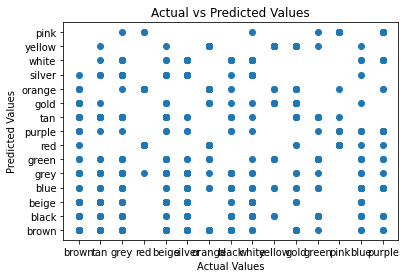

In [ ]:
# Plot actual vs predicted values as a scatter plot
plt.scatter(y_true, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

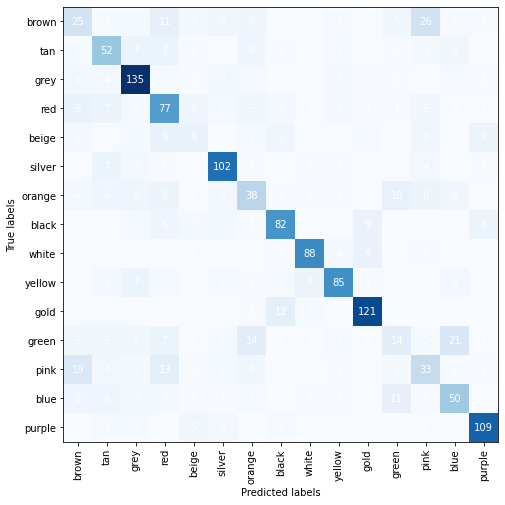

In [ ]:
# Create a confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm, cmap='Blues')
ax.grid(False)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_xticks(range(len(subdirectories)))
ax.set_xticklabels(subdirectories, rotation=90)
ax.set_yticks(range(len(subdirectories)))
ax.set_yticklabels(subdirectories)
ax.set_ylim(len(subdirectories)-0.5, -0.5)
for i in range(len(subdirectories)):
    for j in range(len(subdirectories)):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()